In [ ]:
#Edgar Moises Hernandez-Gonzalez
#15/11/19
#Clasificar RAW con CNN-1D + LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1000, 22)
(288, 1, 1000, 22)


In [62]:
model = Sequential()
model.add(TimeDistributed(Conv1D(8, 3, activation='relu'), input_shape=(None,1000,22)))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Conv1D(16, 3, activation='relu')))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(16))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_48 (TimeDis (None, None, 998, 8)      536       
_________________________________________________________________
time_distributed_49 (TimeDis (None, None, 499, 8)      0         
_________________________________________________________________
time_distributed_50 (TimeDis (None, None, 497, 16)     400       
_________________________________________________________________
time_distributed_51 (TimeDis (None, None, 248, 16)     0         
_________________________________________________________________
time_distributed_52 (TimeDis (None, None, 3968)        0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 16)                255040    
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
__________

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 2s 8ms/sample - loss: 1.4218 - acc: 0.2569 - val_loss: 1.3875 - val_acc: 0.2500
Epoch 2/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3719 - acc: 0.3160 - val_loss: 1.3876 - val_acc: 0.2674
Epoch 3/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3762 - acc: 0.3090 - val_loss: 1.3836 - val_acc: 0.2674
Epoch 4/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3582 - acc: 0.3160 - val_loss: 1.3728 - val_acc: 0.2951
Epoch 5/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3478 - acc: 0.3438 - val_loss: 1.3774 - val_acc: 0.2917
Epoch 6/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3179 - acc: 0.4028 - val_loss: 1.3781 - val_acc: 0.2986
Epoch 7/20
288/288 [==============================] - 1s 2ms/sample - loss: 1.3113 - acc: 0.4410 - val_loss: 1.3727 - val_acc: 0.2812
Epoch 8/20
288/2

In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 839us/sample - loss: 1.3539 - acc: 0.3333
Test loss: 1.3538619147406683
Test accuracy: 0.33333334


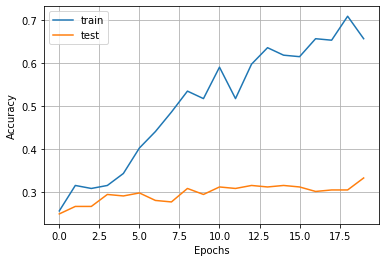

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

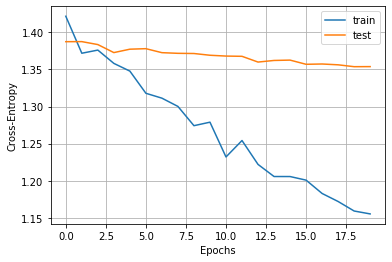

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [69]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [70]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.11111111111111116


In [71]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[31 22 15  4]
 [20 20 24  8]
 [16 11 31 14]
 [11 11 36 14]]


In [72]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.40      0.43      0.41        72
           1       0.31      0.28      0.29        72
           2       0.29      0.43      0.35        72
           3       0.35      0.19      0.25        72

   micro avg       0.33      0.33      0.33       288
   macro avg       0.34      0.33      0.33       288
weighted avg       0.34      0.33      0.33       288

